In [25]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from io import StringIO
import yfinance as yf
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
#header for user-agent to mimic browser request (required by wikipedia)
headers = {    "User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 13_5_1) "
                  "AppleWebKit/605.1.15 (KHTML, like Gecko) "
                  "Version/16.6 Safari/605.1.15"}

#wikipedia page listing S&P 500 companies to be used for selecting stock data
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies#S&P_500_component_stocks"
page = requests.get(url, headers=headers)

In [ ]:
#parse the page using BeautifulSoup, find the stock table by its id, and create dataframe
soup = BeautifulSoup(page.text, "html")
table = soup.find('table', {'id': 'constituents'})
snp500 = pd.read_html(StringIO(str(table)))[0]
snp500.head(5)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
#selects only symbol and sector columns
snp500 = df[["Symbol", "GICS Sector"]]
snp500.head(5)

,Symbol,GICS Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


In [ ]:
#filters df to only include stocks in the information tech sector, resetting index
snp500tech = snp500[snp500["GICS Sector"] == "Information Technology"]
snp500tech = snp500tech.reset_index(drop=True)
snp500tech.head(5)

,Symbol,GICS Sector
0,ACN,Information Technology
1,ADBE,Information Technology
2,AMD,Information Technology
3,AKAM,Information Technology
4,APH,Information Technology


In [26]:
symbols = snp500tech["Symbol"].tolist()
sixmonths =  yf.download(symbols, period="6mo", interval="1d")["Close"]


/var/folders/28/tss65nj10l51sf1n44d9kg300000gn/T/ipykernel_23069/2059540812.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sixmonths =  yf.download(symbols, period="6mo", interval="1d")["Close"]
[*********************100%***********************]  68 of 68 completed


In [33]:
sixmonths.head()

Ticker,AAPL,ACN,ADBE,ADI,ADSK,AKAM,AMAT,AMD,ANET,APH,...,TDY,TEL,TER,TRMB,TXN,TYL,VRSN,WDAY,WDC,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2025-03-05,235.164383,344.817047,451.239990,227.530106,267.239990,82.820000,154.436981,101.669998,87.820000,64.428757,...,497.019989,149.590652,110.042549,69.489998,192.524094,625.140015,239.583527,259.609985,44.066498,304.000000
2025-03-06,234.755386,338.460510,444.779999,220.886749,260.390015,82.809998,150.678452,98.849998,84.339996,61.481621,...,491.269989,146.128174,105.229874,67.650002,186.391098,606.940002,238.599075,253.759995,41.324806,294.559998
2025-03-07,238.486252,338.797119,449.399994,223.950623,259.750000,87.519997,154.794922,100.309998,83.360001,62.656494,...,482.940002,149.620407,108.375084,69.059998,187.552734,588.010010,239.126114,252.380005,41.574051,292.690002
2025-03-10,226.924545,331.985138,435.079987,214.431778,248.399994,84.150002,149.137283,96.629997,77.559998,61.521450,...,479.059998,146.882187,104.810509,66.510002,183.585495,571.260010,237.684219,243.000000,40.417553,283.359985
2025-03-11,220.300766,324.549408,433.660004,207.312469,250.850006,80.650002,146.154343,96.760002,79.129997,61.372097,...,488.420013,143.419708,86.937706,66.489998,174.578003,565.219971,235.218079,242.929993,41.673748,280.329987


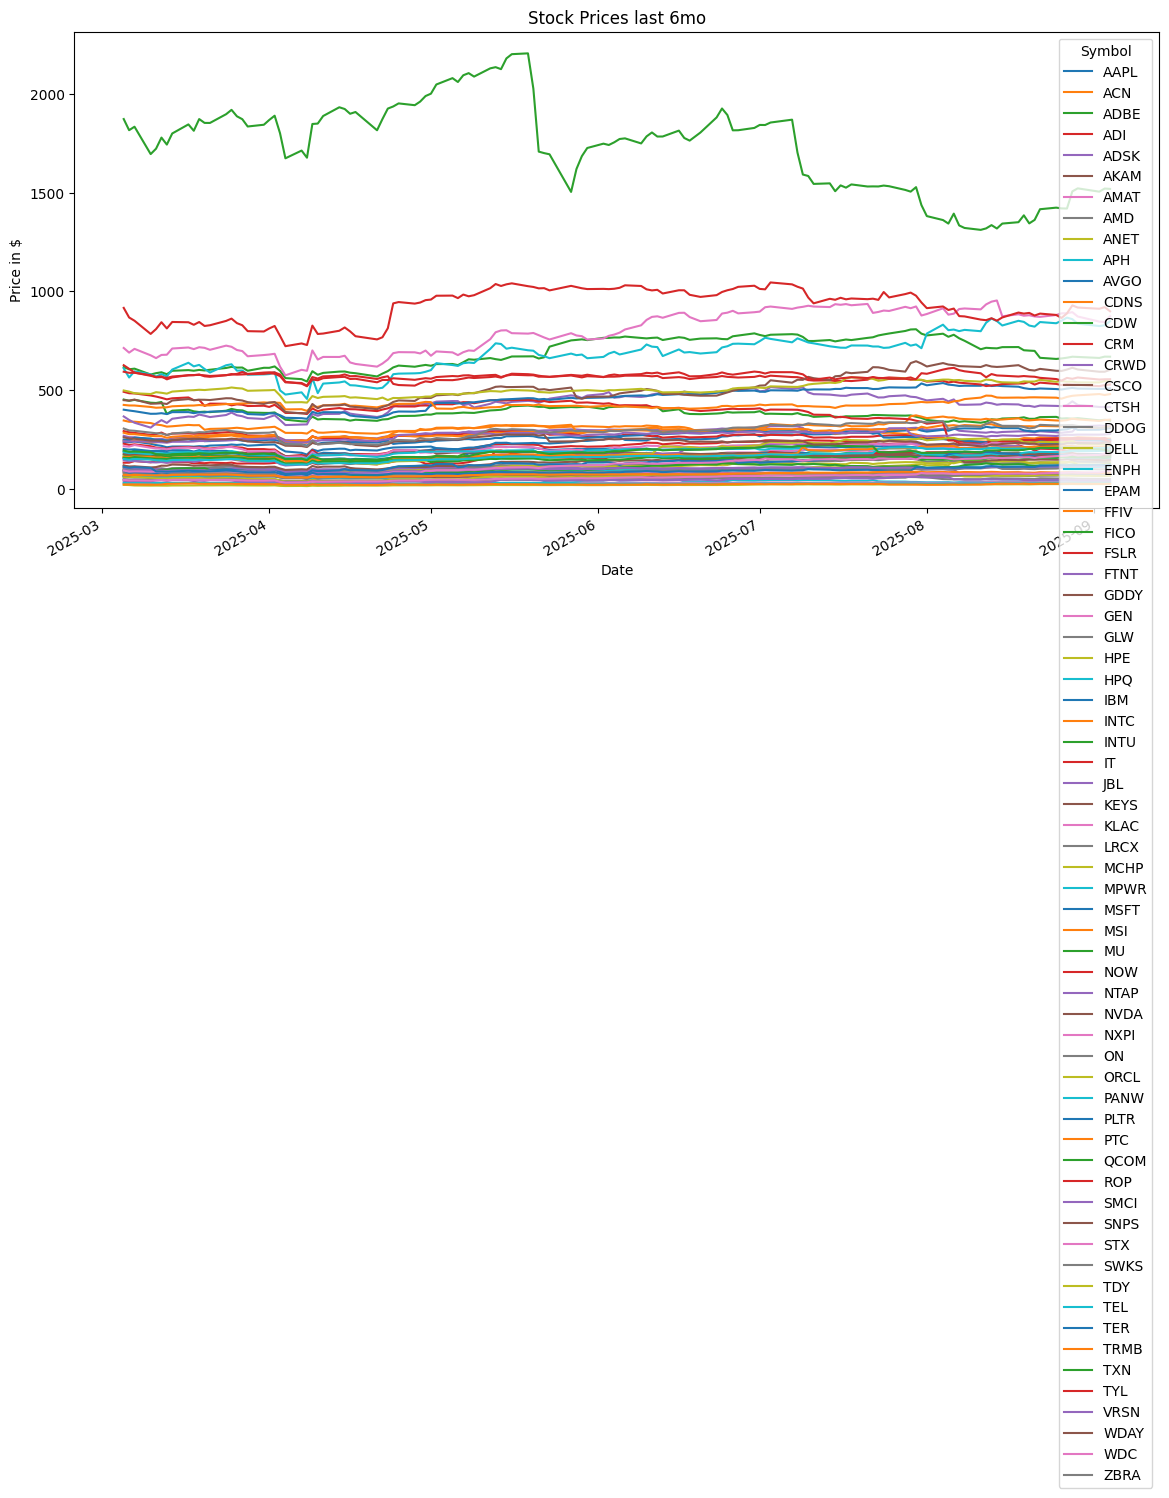

In [36]:
sixmonths.plot(figsize=(14,7))
plt.xlabel("Date")
plt.ylabel("Price in $")
plt.title("Stock Prices last 6mo")
plt.legend(title="Symbol")
plt.show()